In [165]:
import rmtchem 
import timeit
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.integrate import solve_bvp
from scipy.signal import argrelmin
import imp
import cantera as ct
imp.reload(rmtchem)
from scipy.sparse import csr_matrix
plt.rcParams.update({'font.size': 12, 'pdf.fonttype':42,'text.usetex': False, 'font.family': 'serif'})
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

### Example graph 

58


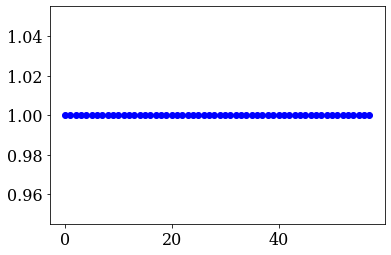

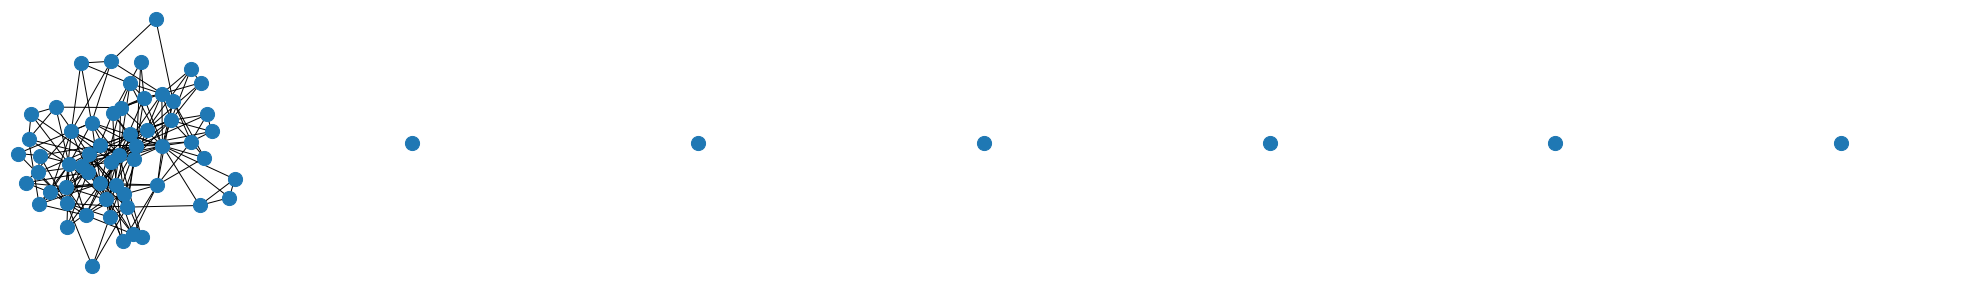

In [2]:
n=64
c=0.5
nr=int(c*n)
seed=1

np.random.seed(seed)
eta,nu,k,G=rmtchem.get_network(n,nr)
adj=np.zeros((n,n))
for r in range(2*nr):
    reac=np.where(eta[r]>0)[0]
    prod=np.where(nu[r]>0)[0]
    for i in reac:
        for j in prod:
            adj[i,j]=1
        #if species are both reactants, they affect rates of change of each other
        for j in reac:
            adj[i,j]=1
g=nx.convert_matrix.from_numpy_matrix(adj)

lcc=np.array(list(max(nx.connected_components(g), key=len)))
n=len(lcc)
eta=eta[:,lcc]
nu=nu[:,lcc]
G=G[lcc]

print(n)
X0=np.exp(-G)
XD1=np.zeros(n)
XD2=np.zeros(n)
success,Xs2=rmtchem.steady(X0,eta,nu,k,XD1,XD2)
plt.plot(Xs2/X0,'bo')
plt.show()

g=nx.convert_matrix.from_numpy_matrix(adj)
components=list(sorted(nx.connected_components(g)))
if len(components)>1:
    fig, ax = plt.subplots(1,len(components),figsize=(5*len(components),5))
    for i in range(len(components)):
        comp=list(components)[i]
        idx=np.array(list(comp))
        nx.draw(nx.convert_matrix.from_numpy_matrix(adj[np.ix_(idx,idx)]),node_size=200,ax=ax[i])
        ax[i].axis('off')
else:
    nx.draw(g,node_size=200)

plt.savefig('plots/fig1b.pdf')
plt.show()
# Xs,success=rmtchem.integrate(X0,eta,nu,k,XD1,XD2,100,0.1,prog=True)
# plt.plot(Xs)
# plt.show()

### Chemical network percolation

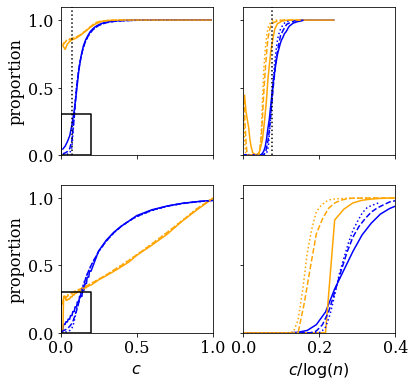

In [3]:
ns=[64,512,4096]
ls=['-','--',':']

plt.subplots(2,2,figsize=(6,6))

plt.subplot(2,2,1)
plt.ylabel("proportion")
plt.ylim(0,1.1)
plt.xlim(0,1)
locs, labels = plt.xticks()
plt.xticks(locs,[])

for i in range(3):
    n=ns[i]
    dat=np.loadtxt('data/er/'+str(n)+'_counts.txt')
    plt.plot(dat[:,1]/(20/3),dat[:,2],color='blue',linestyle=ls[i])
    plt.plot(dat[:,1]/(20/3),dat[:,3],color='orange',linestyle=ls[i])
plt.plot([0,0.2,0.2,0,0],[0.3,0.3,0,0,0.3],color='black')
plt.plot([3/40,3/40],[0,1.1],color='black',linestyle=':')

plt.subplot(2,2,2)
plt.ylim(0,1.1)
plt.xlim(0,0.4)
locs, labels = plt.yticks()
plt.yticks(locs,[])
plt.ylim(0,1.1)

locs, labels = plt.xticks()
plt.xticks(locs,[])
for i in range(3):
    n=ns[i]
    dat=np.loadtxt('data/er/'+str(n)+'_counts.txt')
    plt.plot(dat[:,1]/(20/3)/np.log(n),dat[:,4],color='blue',linestyle=ls[i])
    plt.plot(dat[:,1]/(20/3)/np.log(n),dat[:,5],color='orange',linestyle=ls[i])
plt.plot([3/40,3/40],[0,1.1],color='black',linestyle=':')

plt.subplot(2,2,3)
plt.xlabel('$c$')
plt.ylabel("proportion")
plt.ylim(0,1.1)
plt.xlim(0,1)
for i in range(len(ns)):
    n=ns[i]
    dat=np.loadtxt('data/sing/'+str(n)+'_counts.txt')
    plt.plot(dat[:,1],dat[:,2],color='blue',linestyle=ls[i])
    plt.plot(dat[:,1],dat[:,3],color='orange',linestyle=ls[i])
    
plt.plot([0,0.2,0.2,0,0],[0.3,0.3,0,0,0.3],color='black')

plt.subplot(2,2,4)
plt.xlabel('$c/\log(n)$')
plt.xlim(0,0.4)
plt.ylim(0,1.1)
locs, labels = plt.yticks()
plt.yticks(locs,[])
plt.ylim(0,1.1)

for i in range(len(ns)):
    n=ns[i]
    dat=np.loadtxt('data/sing/'+str(n)+'_counts.txt')
    plt.plot(dat[:,1]/np.log(n),dat[:,4],color='blue',linestyle=ls[i])
    plt.plot(dat[:,1]/np.log(n),dat[:,5],color='orange',linestyle=ls[i])
plt.savefig('plots/fig2.pdf')
plt.show()

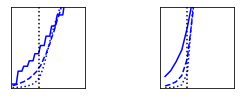

In [4]:
ns=[64,512,4096]
ls=['-','--',':']
fig, axs = plt.subplots(1,2,figsize=(4,1.5))

plt.subplot(1,2,1)
plt.xlim(0,0.2)
plt.ylim(0,0.3)
plt.yticks([],[])
plt.xticks([],[])

for i in range(3):
    n=ns[i]
    dat=np.loadtxt('data/sing/'+str(n)+'_counts.txt')
    plt.plot(dat[:,1],dat[:,2],color='blue',linestyle=ls[i])
plt.plot([3/40,3/40],[0,1.1],color='black',linestyle=':')

plt.subplot(1,2,2)
plt.xlim(0,0.2)
plt.ylim(0,0.3)
plt.yticks([],[])
plt.xticks([],[])

for i in range(3):
    n=ns[i]
    dat=np.loadtxt('data/er/'+str(n)+'_counts.txt')
    plt.plot(dat[:,1]/(20/3),dat[:,2],color='blue',linestyle=ls[i])
plt.plot([3/40,3/40],[0,1.1],color='black',linestyle=':')
plt.subplots_adjust(wspace=1.0,hspace=0.0)

plt.savefig('plots/fig2insets.pdf')
plt.show()


### Bifurcation examples

0.834052	1.562500e-04	8381	
Saddle-node bifurcation!	83.405234	1.562500e-04	1	1	2.007644	0.000000


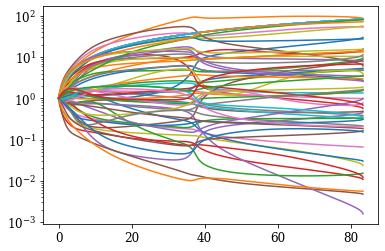

In [449]:
imp.reload(rmtchem)
n=64
nr=int(0.5*n*np.log(n))
nd=int(0.1*n)
na=0
seed=74
np.random.seed(seed)
eta,nu,k,G=rmtchem.get_network(n,nr,na) 
row,col=np.where(eta[::2]-nu[::2]!=0)
data=(eta[::2]-nu[::2])[row,col]
A=csr_matrix((data,(row,col)),shape=(2*nr,n),dtype=int)
adj=A.T.dot(A)
g=nx.convert_matrix.from_scipy_sparse_matrix(adj)
lcc=np.array(list(max(nx.connected_components(g), key=len)))
n=len(lcc)
eta=eta[:,lcc]
nu=nu[:,lcc]
G=G[lcc]
d0=1e6
d1min=0
d1max=100
XD1,XD2,inds=rmtchem.get_drive(eta,nu,k,G,d0,nd)
X0=np.exp(-G)
start=timeit.default_timer()

Xs,epsilons,evals,bif=rmtchem.quasistatic(X0, eta, nu, k, XD1, XD2, d1min,d1max,d1min,1e-2,output=2,stop=True)

plt.figure()
inds1=np.where(np.max(np.real(evals),axis=1)<0)[0]
inds2=np.where(np.max(np.real(evals),axis=1)>=0)[0]
plt.yscale('log')
for inds in np.split(inds1, np.where(np.diff(inds1) != 1)[0]+1):
    for i in range(n):
        plt.plot(epsilons[inds],Xs[inds,i]/np.exp(-G[i]),color=colors[np.mod(i,len(colors))])
for inds in np.split(inds2, np.where(np.diff(inds2) != 1)[0]+1):
    for i in range(n):
        plt.plot(epsilons[inds],Xs[inds,i]/np.exp(-G[i]),ls=':',color=colors[np.mod(i,len(colors))])

109.49327822039555
True


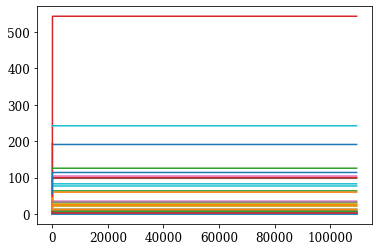

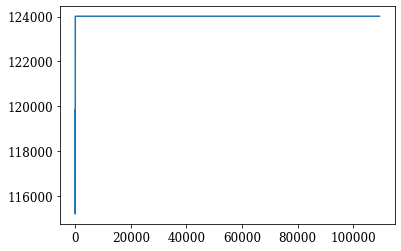

124014.96564701728


In [475]:
X0=Xs[-1]
epsilon=epsilons[-1]+1e-2
ev,evec=np.linalg.eig(rmtchem.jac(0,X0,eta,nu,k,(1+epsilon)*XD1, XD2))
tscale=1/np.abs(ev[np.argmin(np.abs(np.real(ev)))])
print(tscale)
ts,Xts,success=rmtchem.integrate(Xs[-1],eta,nu,k,(1+epsilon+100/steps)*XD1,XD2,1000*tscale,tscale/10)
print(success)
plt.plot(ts,np.transpose(Xts))
plt.show()
sd=[rmtchem.Sdot(rmtchem.rates(Xts[:,i],eta,nu,k)) for i in range(len(ts))]
plt.plot(ts,sd)
plt.show()
m0=np.where(ts>100*tscale)[0][0]
sd2=np.sum(np.diff(ts)[m0-1:]*[rmtchem.Sdot(rmtchem.rates(Xts[:,i],eta,nu,k)) for i in range(m0,len(ts))])/np.sum(np.diff(ts)[m0-1:])
print(sd2)

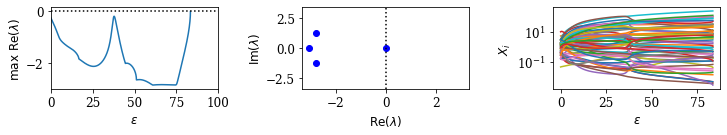

In [476]:
plt.subplots(1,3,figsize=(12,1.5))
plt.subplot(1,3,1)
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$\mathrm{max}~\mathrm{Re}(\lambda)$')
# plt.yscale('symlog')
plt.xlim(0,100)
inds1=np.where(np.max(np.real(evals),axis=1)<0)[0]
inds2=np.where(np.max(np.real(evals),axis=1)>=0)[0]
for inds in np.split(inds1, np.where(np.diff(inds1) != 1)[0]+1):
        plt.plot(epsilons[inds],np.max(np.real(evals),axis=1)[inds],color=colors[0])
for inds in np.split(inds2, np.where(np.diff(inds2) != 1)[0]+1):
        plt.plot(epsilons[inds],np.max(np.real(evals),axis=1)[inds],ls=':',color=colors[0])
plt.plot([0,100],[0,0],ls=':',color='black')

        
plt.subplot(1,3,2)
m=np.where(np.max(np.real(evals),axis=1)>0)[0][0]
lim=1.1*np.max(np.abs(evals[m,np.argsort(np.real(evals[m]))[-3:]]))
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)
plt.ylabel(r'$\mathrm{Im}(\lambda)$')
plt.xlabel(r'$\mathrm{Re}(\lambda)$')
plt.plot(np.real(evals[m]),np.imag(evals[m]),'bo')
plt.plot([0,0],[-lim,lim],ls=':',color='black')

plt.subplot(1,3,3)
inds1=np.where(np.max(np.real(evals),axis=1)<0)[0]
inds2=np.where(np.max(np.real(evals),axis=1)>=0)[0]
plt.yscale('log')
plt.ylabel(r"$X_i$")
plt.xlabel('$\epsilon$')
for inds in np.split(inds1, np.where(np.diff(inds1) != 1)[0]+1):
    for i in range(n):
        plt.plot(epsilons[inds],Xs[inds,i],color=colors[np.mod(i,len(colors))])
for inds in np.split(inds2, np.where(np.diff(inds2) != 1)[0]+1):
    for i in range(n):
        plt.plot(epsilons[inds],Xs[inds,i],ls=':',color=colors[np.mod(i,len(colors))])
        
plt.subplots_adjust(wspace=0.5,hspace=0.0)
plt.savefig('plots/fig3a.pdf')
plt.show()

In [497]:
print(n,nr,nd,na)

64 133 6 0


0.426500	1.000000e-02	4266	
Hopf bifurcation!		42.660000
4266 1


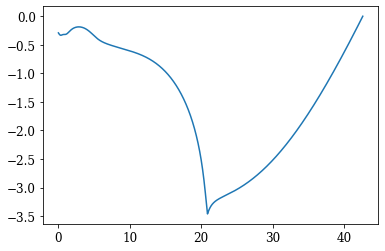

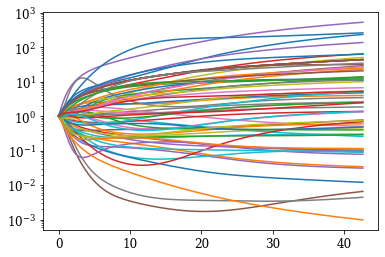

In [504]:
imp.reload(rmtchem)
n=64
nr=int(0.5*n*np.log(n))
nd=int(0.1*n)
na=0
seed=21

np.random.seed(seed)
eta,nu,k,G=rmtchem.get_network(n,nr,na)

row,col=np.where(eta[::2]-nu[::2]!=0)
data=(eta[::2]-nu[::2])[row,col]
A=csr_matrix((data,(row,col)),shape=(2*nr,n),dtype=int)
adj=A.T.dot(A)
g=nx.convert_matrix.from_scipy_sparse_matrix(adj)
lcc=np.array(list(max(nx.connected_components(g), key=len)))
n=len(lcc)
eta=eta[:,lcc]
nu=nu[:,lcc]
G=G[lcc]

d0=1e6
d1min=0
d1max=100
XD1,XD2,inds=rmtchem.get_drive(eta,nu,k,G,d0,nd)
X0=np.exp(-G)
Xs,epsilons,evals,bif=rmtchem.quasistatic(X0, eta, nu, k, XD1, XD2,d1min,d1max, d1min,1e-2, output=2,stop=True)
print(len(Xs),bif)
plt.plot(epsilons,np.max(np.real(evals),axis=1))
plt.show()

inds1=np.where(np.max(np.real(evals),axis=1)<0)[0]
inds2=np.where(np.max(np.real(evals),axis=1)>=0)[0]
plt.yscale('log')
for inds in np.split(inds1, np.where(np.diff(inds1) != 1)[0]+1):
    for i in range(n):
        plt.plot(epsilons[inds],Xs[inds,i]/np.exp(-G[i]),color=colors[np.mod(i,len(colors))])
for inds in np.split(inds2, np.where(np.diff(inds2) != 1)[0]+1):
    for i in range(n):
        plt.plot(epsilons[inds],Xs[inds,i]/np.exp(-G[i]),ls=':',color=colors[np.mod(i,len(colors))])
        
plt.show()

43.649999999999885
0.879744745005155


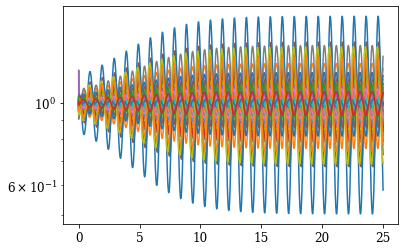

In [478]:
m=np.where(np.max(np.real(evals),axis=1)>0)[0][0]+100
epsilon=epsilons[m]
print(epsilon)
period=2*np.pi/(np.imag(evals[m,np.argmax(np.real(evals[m]))]))

start=timeit.default_timer()
ts,Xts,success=rmtchem.integrate(Xs[m]*(1+(0.5-np.random.random(size=n))*1e-1), eta, nu, k, (1+epsilon)*XD1,XD2,25*period,period/100)
stop=timeit.default_timer()
print(stop-start)
plt.yscale('log')
plt.plot(ts/period,np.transpose(Xts)/Xs[m])
plt.show()

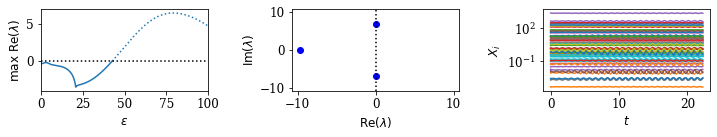

In [479]:
plt.subplots(1,3,figsize=(12,1.5))
plt.subplot(1,3,1)
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$\mathrm{max}~\mathrm{Re}(\lambda)$')
plt.xlim(0,100)
inds1=np.where(np.max(np.real(evals),axis=1)<0)[0]
inds2=np.where(np.max(np.real(evals),axis=1)>=0)[0]
for inds in np.split(inds1, np.where(np.diff(inds1) != 1)[0]+1):
        plt.plot(epsilons[inds],np.max(np.real(evals),axis=1)[inds],color=colors[0])
for inds in np.split(inds2, np.where(np.diff(inds2) != 1)[0]+1):
        plt.plot(epsilons[inds],np.max(np.real(evals),axis=1)[inds],ls=':',color=colors[0])
plt.plot([0,100],[0,0],ls=':',color='black')

plt.subplot(1,3,2)
m=np.where(np.max(np.real(evals),axis=1)>0)[0][0]
lim=1.1*np.max(np.abs(evals[m,np.argsort(np.real(evals[m]))[-3:]]))
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)
plt.ylabel(r'$\mathrm{Im}(\lambda)$')
plt.xlabel(r'$\mathrm{Re}(\lambda)$')
plt.plot(np.real(evals[m]),np.imag(evals[m]),'bo')
plt.plot([0,0],[-lim,lim],ls=':',color='black')


plt.subplot(1,3,3)
plt.yscale('log')
plt.ylabel('$X_i$')
plt.xlabel('$t$')
plt.plot(ts,np.transpose(Xts))
plt.subplots_adjust(wspace=0.5,hspace=0.0)
plt.savefig('plots/fig3b.pdf')
plt.show()

In [509]:
1/np.real(ev[np.argmin(np.abs(np.real(ev)))])

24402.701624374244

In [516]:
X0=Xs[-1]
epsilon=epsilons[-1]+1e-1
ev,evec=np.linalg.eig(rmtchem.jac(0,X0,eta,nu,k,(1+epsilon)*XD1, XD2))
tscale=1/np.max(np.real(ev))
start=timeit.default_timer()
ts,Xts,success=rmtchem.integrate(Xs[-1],eta,nu,k,(1+epsilon+100/steps)*XD1,XD2,10*tscale,tscale/10)
stop=timeit.default_timer()
print(success,stop-start)
plt.plot(ts,np.transpose(Xts))
plt.show()
sd=[rmtchem.Sdot(rmtchem.rates(Xts[:,i],eta,nu,k)) for i in range(len(ts))]
plt.plot(ts,sd)
plt.show()
m0=np.where(ts>100*tscale)[0][0]
sd2=np.sum(np.diff(ts)[m0-1:]*[rmtchem.Sdot(rmtchem.rates(Xts[:,i],eta,nu,k)) for i in range(m0,len(ts))])/np.sum(np.diff(ts)[m0-1:])
print(sd2)

KeyboardInterrupt: 

### Bifurcations vs reactivity, catalyticity, and driving proportion

(54, 6)


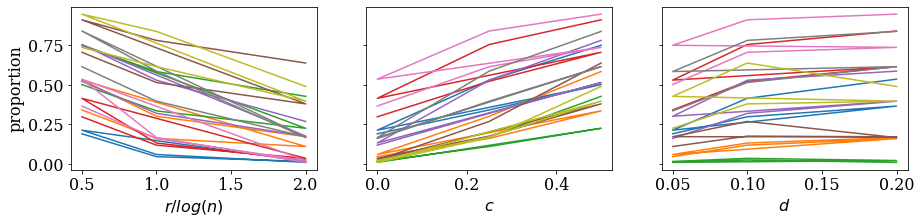

In [15]:
ns=[64,128]
cs=[0.5,1.0,2.0]
ds=[0.05, 0.1, 0.2]
ass=[0,0.25,0.5]
tab=[]
for n in ns:
    for c in cs:
        for d in ds:
            for a in ass:
                vals=np.loadtxt('data/hystereses/'+str(n)+'_'+str(c)+'_'+str(d)+'_'+str(a)+'.txt')
                tot=np.count_nonzero(vals[:,4]==0)+np.count_nonzero(vals[:,4]==1)+np.count_nonzero(vals[:,4]==2)
                tab.append([c, d, a, np.count_nonzero(vals[:,4]==1)/tot,  np.count_nonzero(vals[:,4]==2)/tot,np.count_nonzero(vals[:,4]<0)/tot])
                
tab=np.array(tab)
print(tab.shape)
cs=np.unique(tab[:,0])
ds=np.unique(tab[:,1])
ass=np.unique(tab[:,2])

fig,ax=plt.subplots(1,3,figsize=(15,3))
plt.subplot(1,3,1)
plt.xlabel('$r/log(n)$')
plt.ylabel('proportion')
for d in ds:
    for a in ass:
        ind=np.where(np.all(tab[:,[1,2]]==[d,a],axis=1))[0]
        plt.plot(tab[ind,0],tab[ind,4]+tab[ind,3])

plt.subplot(1,3,2)
plt.tick_params(axis='y', which='both', left=True,  right=False, labelleft=False) 
plt.xlabel('$c$')
for d in ds:
    for c in cs:
        ind=np.where(np.all(tab[:,[1,0]]==[d,c],axis=1))[0]
        plt.plot(tab[ind,2],tab[ind,4]+tab[ind,3])

plt.subplot(1,3,3)
plt.tick_params(axis='y', which='both', left=True,  right=False, labelleft=False) 
plt.xlabel('$d$')
for a in ass:
    for c in cs:
        ind=np.where(np.all(tab[:,[2,0]]==[a,c],axis=1))[0]
        plt.plot(tab[ind,1],tab[ind,4]+tab[ind,3])
plt.savefig('plots/fig4.pdf',transparent=True)
plt.show()

In [97]:
from scipy.stats import ttest_ind,pearsonr

for n in ns:
    for d in ds:
        for c in cs:
            for a in as:
                vals=np.loadtxt('data/hystereses2/'+str(n)+'_'+str(c)+'_'+str(d)+'_'+str(a)+'.txt')
                x=vals[np.where(vals[:,4]==2.)[0],5]
                y=(vals[np.where(vals[:,4]==2.)[0],8]-vals[np.where(vals[:,4]==2.)[0],9])/c
                print(pearsonr(x,y))

(0.007023553559090158, 0.9398295749215291)
(0.05031621681687626, 0.6596683575935252)
(0.4774085427787028, 0.0013885822371962962)
(-0.01021271270369667, 0.9033048204107208)
(-0.0020229801519840163, 0.9846455974059817)
(-0.07887154440665113, 0.538920812984755)
(0.13433772652730494, 0.18494384253712537)
(-0.056084641418866814, 0.6785993008655892)
(-0.12374386963283965, 0.4020580215137715)


### Empirical reaction network stoichiometry

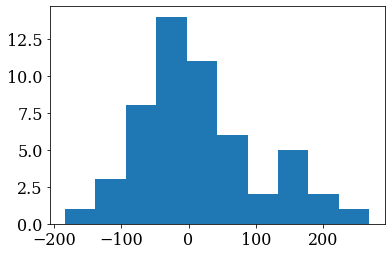

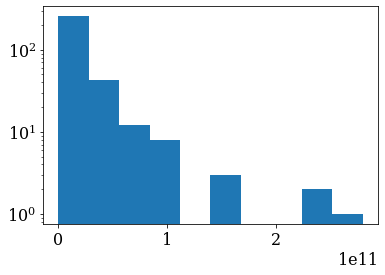

In [7]:
gas=ct.Solution('gri30.cti')
plt.hist(gas.standard_gibbs_RT)
plt.show()
plt.yscale('log')
plt.hist(gas.forward_rate_constants)
plt.show()

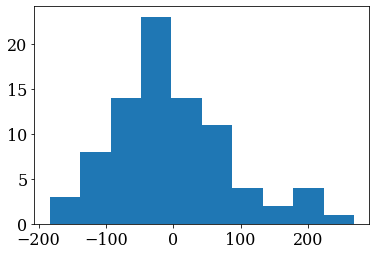

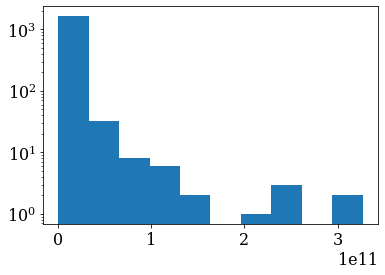

In [8]:
gas=ct.Solution('pyrolysis.cti')
plt.hist(gas.standard_gibbs_RT)
plt.show()
indices=np.where(gas.forward_rate_constants<1e15)[0]
plt.yscale('log')
plt.hist(gas.forward_rate_constants[indices])
plt.show()

## Generate input files for XPPAUTO and and matcont benchmarks

[0]
0.660000	1.000000e-01	666	
Hopf bifurcation!		66.100000
1006 1 0.81537721399945446	


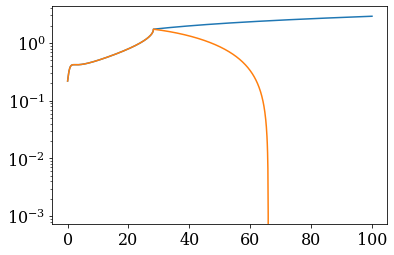

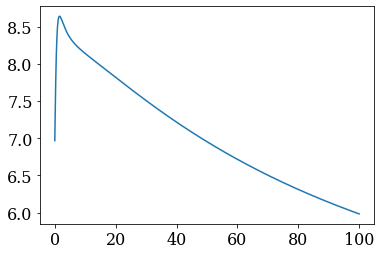

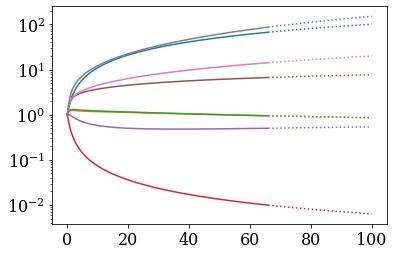

In [313]:
imp.reload(rmtchem)
n=8
nr=int(1.0*n*np.log(n))
nd=int(0.2*n)
na=int(0.5*nr)
seed=26
np.random.seed(seed)
eta,nu,k,G=rmtchem.get_network(n,nr,na) 
row,col=np.where(eta[::2]-nu[::2]!=0)
data=(eta[::2]-nu[::2])[row,col]
A=csr_matrix((data,(row,col)),shape=(2*nr,n),dtype=int)
adj=A.T.dot(A)
g=nx.convert_matrix.from_scipy_sparse_matrix(adj)
lcc=np.array(list(max(nx.connected_components(g), key=len)))
n=len(lcc)
eta=eta[:,lcc]
nu=nu[:,lcc]
G=G[lcc]
d0=1e6
d1min=0
d1max=100
XD1,XD2,inds=rmtchem.get_drive(eta,nu,k,G,d0,nd)
X0=np.exp(-G)
print(inds)

r=np.linalg.matrix_rank(adj.toarray()[np.ix_(lcc,lcc)])
if(r==n):
    start=timeit.default_timer()
    Xs,epsilons,evals,bif=rmtchem.quasistatic(X0, eta, nu, k, XD1, XD2, d1min,d1max,d1min,dep0=1e-1,depmax=1e-1,depmin=1e-8,output=2, stop=False)
    stop=timeit.default_timer()
    print(len(Xs),bif,stop-start)

    file=open('rmtchem.ode','w')
    for i in range(n):
        if i in inds:
            print('X[%i]\'=ep*D[%i]-E[%i]*X[%i]'%(i,i,i,i),end='',file=file)
        else:
            print('X[%i]\'=0'%(i),end='',file=file)
        for j in range(2*nr):
            if((eta[j,i]-nu[j,i])!=0):
                print('+(%i)*%f'%(eta[j,i]-nu[j,i],k[j]),end='',file=file)
                inds2=np.where(nu[j]>0)[0]
                for l in inds2:
                    print('*X[%i]^(%i)'%(l,nu[j,l]),end='',file=file)
        print('\n',end='',file=file)

    for i in range(n):
        print('init X[%i]=%f'%(i,np.exp(-G)[i]),file=file)

    print('par ep=1',file=file)
    for i in range(n):
        if i in inds:
            print('par D[%i]=%f'%(i,XD1[i]),file=file)    
            print('par E[%i]=%f'%(i,XD2[i]),file=file)

    print('@ XP=T,YP=X0,XLO=0,XHI=1000,YLO=0,YHI=10',file=file)
    print('@ meth=cvode,dt=0.01,total=1000,nout=1000',file=file)
    print('@ NTST=100, NMAX=1000000, NPR=0, DSMIN=1e-6, DSMAX=1e-1, DS=1e-3, PARMIN=1.0, PARMAX=100',file=file)
    print('@ EPSU=1e-6, EPSL=1e-6, EPSS=1e-6',file=file)
    ind=np.setdiff1d(np.arange(n),inds)[0]
    print('@ NORMMAX=1e10, AUTOXMIN=0.0, AUTOXMAX=%f, AUTOYMIN=0, AUTOYMAX=%f, AUTOVAR=X%i'%(np.max(epsilons),np.max(Xs[:,ind]),ind),file=file)
    print('@ runnow=1, bound=100000',file=file)
    print('done',file=file)

    file.close()
    
plt.yscale('log')
plt.plot(epsilons,np.min(np.abs(evals),axis=1))
plt.plot(epsilons,-np.max(np.real(evals),axis=1))
plt.show()
plt.plot(epsilons,Xs[:,ind])
plt.show()
    
inds1=np.where(np.max(np.real(evals),axis=1)<0)[0]
inds2=np.where(np.max(np.real(evals),axis=1)>=0)[0]
plt.yscale('log')
for inds in np.split(inds1, np.where(np.diff(inds1) != 1)[0]+1):
    for i in range(n):
        plt.plot(epsilons[inds],Xs[inds,i]/np.exp(-G[i]),color=colors[np.mod(i,len(colors))])
for inds in np.split(inds2, np.where(np.diff(inds2) != 1)[0]+1):
    for i in range(n):
        plt.plot(epsilons[inds],Xs[inds,i]/np.exp(-G[i]),ls=':',color=colors[np.mod(i,len(colors))])
plt.show()

[0]
0.278000	1.000000e-01	279	
Hopf bifurcation!		27.900000
0.492000	1.000000e-01	493	
Hopf bifurcation!		49.300000
1001 1 0.97223585100073251	


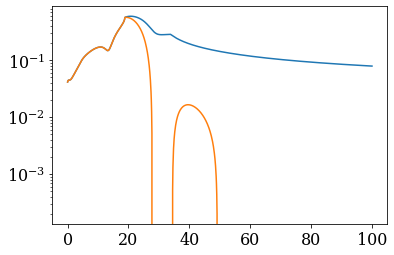

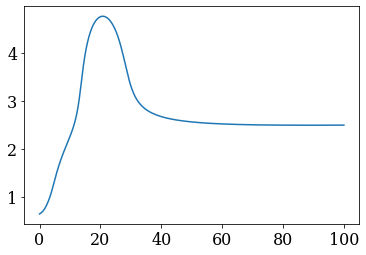

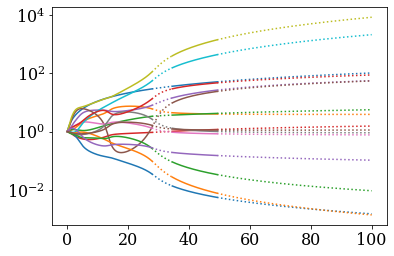

In [444]:
imp.reload(rmtchem)
n=8
nr=int(1.0*n*np.log(n))
nd=int(0.2*n)
na=int(0.5*nr)
seed=287

n=16
nr=int(0.5*n*np.log(n))
nd=int(0.1*n)
na=int(0.0*nr)
seed=3
np.random.seed(seed)
eta,nu,k,G=rmtchem.get_network(n,nr,na) 
row,col=np.where(eta[::2]-nu[::2]!=0)
data=(eta[::2]-nu[::2])[row,col]
A=csr_matrix((data,(row,col)),shape=(2*nr,n),dtype=int)
adj=A.T.dot(A)
g=nx.convert_matrix.from_scipy_sparse_matrix(adj)
lcc=np.array(list(max(nx.connected_components(g), key=len)))
n=len(lcc)
eta=eta[:,lcc]
nu=nu[:,lcc]
G=G[lcc]
d0=1e6
d1min=0
d1max=100
XD1,XD2,inds=rmtchem.get_drive(eta,nu,k,G,d0,nd)
X0=np.exp(-G)
print(inds)

r=np.linalg.matrix_rank(adj.toarray()[np.ix_(lcc,lcc)])
if(r==n):
    start=timeit.default_timer()
    Xs,epsilons,evals,bif=rmtchem.quasistatic(X0, eta, nu, k, XD1, XD2, d1min,d1max,d1min,dep0=1e-1,depmax=1e-1,depmin=1e-8,output=2, stop=False)
    stop=timeit.default_timer()
    print(len(Xs),bif,stop-start)

    file=open('rmtchem.ode','w')
    for i in range(n):
        if i in inds:
            print('X[%i]\'=(ep*D[%i]-E[%i]*exp(X[%i])'%(i,i,i,i),end='',file=file)
        else:
            print('X[%i]\'=(0'%(i),end='',file=file)
        for j in range(2*nr):
            if((eta[j,i]-nu[j,i])!=0):
                print('+(%i)*%f'%(eta[j,i]-nu[j,i],k[j]),end='',file=file)
                inds2=np.where(nu[j]>0)[0]
                for l in inds2:
                    print('*exp(X[%i])^(%i)'%(l,nu[j,l]),end='',file=file)
        print(')/exp(X[%i])\n'%(i),end='',file=file)

    for i in range(n):
        print('init X[%i]=%f'%(i,-G[i]),file=file)

    print('par ep=1',file=file)
    for i in range(n):
        if i in inds:
            print('par D[%i]=%f'%(i,XD1[i]),file=file)    
            print('par E[%i]=%f'%(i,XD2[i]),file=file)

    print('@ XP=T,YP=X0,XLO=0,XHI=1000,YLO=0,YHI=10',file=file)
    print('@ meth=cvode,dt=0.01,total=1000,nout=1000',file=file)
    print('@ NTST=100, NMAX=1000000, NPR=0, DSMIN=1e-6, DSMAX=1e-1, DS=1e-3, PARMIN=1.0, PARMAX=100',file=file)
    print('@ EPSU=1e-6, EPSL=1e-6, EPSS=1e-6',file=file)
    ind=np.setdiff1d(np.arange(n),inds)[0]
    print('@ NORMMAX=1e10, AUTOXMIN=0.0, AUTOXMAX=%f, AUTOYMIN=0, AUTOYMAX=%f, AUTOVAR=X%i'%(np.max(epsilons),np.max(Xs[:,ind]),ind),file=file)
    print('@ runnow=1, bound=100000',file=file)
    print('done',file=file)

    file.close()
    
plt.yscale('log')
plt.plot(epsilons,np.min(np.abs(evals),axis=1))
plt.plot(epsilons,-np.max(np.real(evals),axis=1))
plt.show()
plt.plot(epsilons,Xs[:,ind])
plt.show()
    
inds1=np.where(np.max(np.real(evals),axis=1)<0)[0]
inds2=np.where(np.max(np.real(evals),axis=1)>=0)[0]
plt.yscale('log')
for inds in np.split(inds1, np.where(np.diff(inds1) != 1)[0]+1):
    for i in range(n):
        plt.plot(epsilons[inds],Xs[inds,i]/np.exp(-G[i]),color=colors[np.mod(i,len(colors))])
for inds in np.split(inds2, np.where(np.diff(inds2) != 1)[0]+1):
    for i in range(n):
        plt.plot(epsilons[inds],Xs[inds,i]/np.exp(-G[i]),ls=':',color=colors[np.mod(i,len(colors))])
plt.show()

In [ ]:
# imp.reload(rmtchem)
n=8
nr=int(1.0*n*np.log(n))
nd=int(0.2*n)
na=int(0.5*nr)
seed=26
np.random.seed(seed)
eta,nu,k,G=rmtchem.get_network(n,nr,na) 
row,col=np.where(eta[::2]-nu[::2]!=0)
data=(eta[::2]-nu[::2])[row,col]
A=csr_matrix((data,(row,col)),shape=(2*nr,n),dtype=int)
adj=A.T.dot(A)
g=nx.convert_matrix.from_scipy_sparse_matrix(adj)
lcc=np.array(list(max(nx.connected_components(g), key=len)))
n=len(lcc)
eta=eta[:,lcc]
nu=nu[:,lcc]
G=G[lcc]
d0=1e6
d1min=0
d1max=100
XD1,XD2,inds=rmtchem.get_drive(eta,nu,k,G,d0,nd)
X0=np.exp(-G)
print(inds)

r=np.linalg.matrix_rank(adj.toarray()[np.ix_(lcc,lcc)])
if(r==n):

    Xs,epsilons,evals,bif=rmtchem.quasistatic(X0, eta, nu, k, XD1, XD2, d1min,d1max,d1min,dep0=1e-1,depmin=1e-8,output=2, stop=False)
    print(len(Xs),bif)

    file=open('rmtchem2.ode','w')
    print('X0',file=file,end='')
    for i in range(1,n):
        print(',X%i'%(i),file=file,end='')
    print('',file=file)

    print('ep',file=file,end='')
    for i in range(n):
        if i in inds:
            print(',D%i'%(i),file=file,end='')    
            print(',E%i'%(i),file=file,end='')
    print('',file=file)

    for i in range(n):
        if i in inds:
            print('X%i\'=ep*D%i-E%i*X%i'%(i,i,i,i),end='',file=file)
        else:
            print('X%i\'=0'%(i),end='',file=file)
        for j in range(2*nr):
            if((eta[j,i]-nu[j,i])!=0):
                print('+(%i)*%f'%(eta[j,i]-nu[j,i],k[j]),end='',file=file)
                inds2=np.where(nu[j]>0)[0]
                for l in inds2:
                    print('*X%i^(%i)'%(l,nu[j,l]),end='',file=file)
        print('\n',end='',file=file)

    print('x=[%f'%(np.exp(-G)[0]),file=file,end='')
    for i in range(1,n):
        print(';%f'%(np.exp(-G)[i]),file=file,end='')
    print(']',file=file)

    print('param=[%f'%(1),file=file,end='')
    for i in range(n):
        if i in inds:
            print(';%f'%(XD1[i]),file=file,end='')    
            print(';%f'%(XD2[i]),file=file,end='')
    print(']',file=file)
    file.close()
    
plt.yscale('log')
plt.plot(epsilons,np.min(np.abs(evals),axis=1))
plt.plot(epsilons,-np.max(np.real(evals),axis=1))
plt.show()
plt.plot(epsilons,Xs[:,ind])
plt.show()
    
inds1=np.where(np.max(np.real(evals),axis=1)<0)[0]
inds2=np.where(np.max(np.real(evals),axis=1)>=0)[0]
plt.yscale('log')
for inds in np.split(inds1, np.where(np.diff(inds1) != 1)[0]+1):
    for i in range(n):
        plt.plot(epsilons[inds],Xs[inds,i]/np.exp(-G[i]),color=colors[np.mod(i,len(colors))])
for inds in np.split(inds2, np.where(np.diff(inds2) != 1)[0]+1):
    for i in range(n):
        plt.plot(epsilons[inds],Xs[inds,i]/np.exp(-G[i]),ls=':',color=colors[np.mod(i,len(colors))])
plt.show()

## Chemical chaos 

[42 20  1  5 24  7]
0.106290	1.000000e-02	1088	
Hopf bifurcation!		10.639000
0.144090	1.000000e-02	1497	
Hopf bifurcation!		14.419000
0.182190	1.000000e-02	1878	
Hopf bifurcation!		18.229000
0.262625	4.882813e-06	2746	
Saddle-node bifurcation!	26.262550	4.882813e-06	1	1	2.018457	0.000000
0.140434	-4.882813e-06	4142	
Saddle-node bifurcation!	14.043429	-4.882813e-06	1	1	1.956715	0.000000
0.150233	1.000000e-02	4331	
Hopf bifurcation!		15.033336
0.659770	4.882813e-06	9484	
Saddle-node bifurcation!	65.976969	4.882813e-06	1	1	0.000001	1.965390
0.203753	-4.882813e-06	14229	
Saddle-node bifurcation!	20.375328	-4.882813e-06	1	1	2.011418	0.000000
0.213052	1.000000e-02	14414	
Hopf bifurcation!		21.315240
0.557078	4.882813e-06	17917	
Saddle-node bifurcation!	55.707779	4.882813e-06	1	1	2.006970	0.000000
0.256064	-4.882813e-06	21082	
Saddle-node bifurcation!	25.606437	-4.882813e-06	1	1	2.149534	0.000000
0.452316	4.882813e-06	23187	
Saddle-node bifurcation!	45.231627	4.882813e-06	1	1	0.000118	1.63539

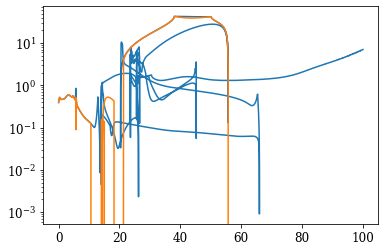

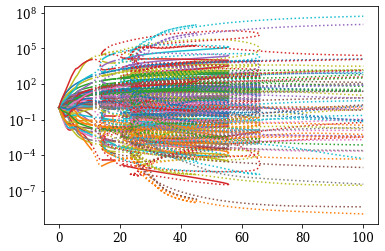

In [445]:
imp.reload(rmtchem)
n=64
nr=int(0.5*n*np.log(n))
nd=int(0.1*n)
na=int(0.5*nr)
seed=1010

np.random.seed(seed)
eta,nu,k,G=rmtchem.get_network(n,nr,na) 
row,col=np.where(eta[::2]-nu[::2]!=0)
data=(eta[::2]-nu[::2])[row,col]
A=csr_matrix((data,(row,col)),shape=(2*nr,n),dtype=int)
adj=A.T.dot(A)
g=nx.convert_matrix.from_scipy_sparse_matrix(adj)
lcc=np.array(list(max(nx.connected_components(g), key=len)))
n=len(lcc)
eta=eta[:,lcc]
nu=nu[:,lcc]
G=G[lcc]
d0=1e6
d1min=0
d1max=100
XD1,XD2,inds=rmtchem.get_drive(eta,nu,k,G,d0,nd)
X0=np.exp(-G)
print(inds)

r=np.linalg.matrix_rank(adj.toarray()[np.ix_(lcc,lcc)])
if(r==n):
    start=timeit.default_timer()
#     Xs,epsilons,evals,bif=rmtchem.quasistatic(X0, eta, nu, k, XD1, XD2, d1min,d1max,0,1e-3,epthrs=1e-3,depmax=1e-2,depmin=1e-8,output=2, stop=False)
    Xs,epsilons,evals,bif=rmtchem.quasistatic(X0, eta, nu, k, XD1, XD2, d1min,d1max,0,1e-3,epthrs=1e-4,depmax=1e-2,depmin=1e-12,output=2, stop=False)
    stop=timeit.default_timer()
    print(len(Xs),bif,stop-start)

plt.yscale('log')
plt.plot(epsilons,np.min(np.abs(evals),axis=1))
plt.plot(epsilons,-np.max(np.real(evals),axis=1))
plt.show()

inds1=np.where(np.max(np.real(evals),axis=1)<0)[0]
inds2=np.where(np.max(np.real(evals),axis=1)>=0)[0]
plt.yscale('log')
for inds in np.split(inds1, np.where(np.diff(inds1) != 1)[0]+1):
    for i in range(n):
        plt.plot(epsilons[inds],Xs[inds,i]/np.exp(-G[i]),color=colors[np.mod(i,len(colors))])
for inds in np.split(inds2, np.where(np.diff(inds2) != 1)[0]+1):
    for i in range(n):
        plt.plot(epsilons[inds],Xs[inds,i]/np.exp(-G[i]),ls=':',color=colors[np.mod(i,len(colors))])
plt.show()

In [140]:
np.save('data/chaos/Xs1.npy',Xs)
np.save('data/chaos/epsilons1.npy',epsilons)
np.save('data/chaos/evals1.npy',evals)

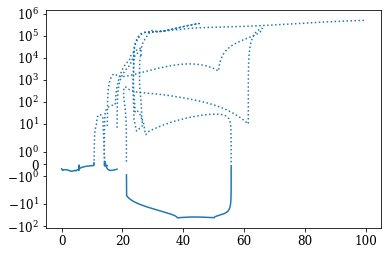

In [446]:
inds1=np.where(np.max(np.real(evals),axis=1)<1e-1)[0]
inds2=np.where(np.max(np.real(evals),axis=1)>-1e-1)[0]
plt.yscale('symlog')
for inds in np.split(inds1, np.where(np.diff(inds1) != 1)[0]+1):
    plt.plot(epsilons[inds],np.max(np.real(evals[inds]),axis=1),color=colors[0])
for inds in np.split(inds2, np.where(np.diff(inds2) != 1)[0]+1):
    plt.plot(epsilons[inds],np.max(np.real(evals[inds]),axis=1),ls=':',color=colors[0])
plt.show()

In [447]:
norms=[]
tmax=1e2
dt=1e0
start=timeit.default_timer()
for epsilon in range(10,100,10):
    for seed in range(10):
        np.random.seed(seed)
        ts,Xts,success=rmtchem.integrate(np.exp(-G)*(1+(0.5-np.random.random(size=n))*1e0), eta, nu, k, (1+epsilon)*XD1,XD2,tmax,dt)
        success,sol=rmtchem.steady(Xts[:,-1],eta,nu,k,(1+epsilon)*XD1,XD2)
        print(epsilon,seed,success,np.min(np.linalg.norm((sol-Xs)/sol,axis=1)),end='\t\r')
        if(success and np.min(np.linalg.norm((sol-Xs)/sol,axis=1))>1e0):
            print(epsilon,seed,success,np.min(np.linalg.norm((sol-Xs)/sol,axis=1)))

10 0 True 199.06668207011631	
10 2 True 199.06668207056913	2	
10 6 True 199.06668206988917	2		
10 9 True 199.06668207035113	33	


/Users/zack/opt/anaconda3/envs/cantera_env/lib/python3.7/site-packages/scipy/integrate/_ode.py:1348: UserWarning: lsoda: Repeated error test failures (internal error).
  self.messages.get(istate, unexpected_istate_msg)))


KeyboardInterrupt: 

38.448072282000794 True


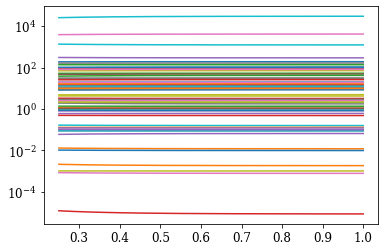

True
-0.05878715436314187 948.2405762845959


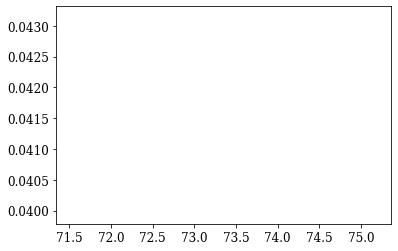

In [421]:
imp.reload(rmtchem)
np.random.seed(1)
epsilon=20
tmax=1e2
dt=1e-3
start=timeit.default_timer()
ts,Xts,success=rmtchem.integrate(np.exp(-G)*(1+(0.5-np.random.random(size=n))*1e-1), eta, nu, k, (1+epsilon)*XD1,XD2,tmax,dt)
stop=timeit.default_timer()
print(stop-start,success)
tinds=np.where(ts>ts[-1]/4)[0]

plt.yscale('log')
plt.plot(ts[tinds]/tmax,np.transpose(Xts[:,tinds])/Xs[m])
plt.show()
success,sol=rmtchem.steady(Xts[:,-1],eta,nu,k,(1+epsilon)*XD1,XD2)
print(success)
ev,evecs=np.linalg.eig(rmtchem.jac(0,sol,eta,nu,k,(1+epsilon)*XD1,XD2))
print(np.max(np.real(ev)),np.min(np.linalg.norm((sol-Xs)/sol,axis=1)))
plt.plot(Xts[0,tinds],Xts[1,tinds],linewidth=0.01,alpha=1.0)
plt.show()

31.04489296200336 True


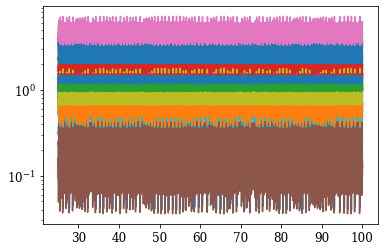

False
12.754893577628824 0.6170199786777434


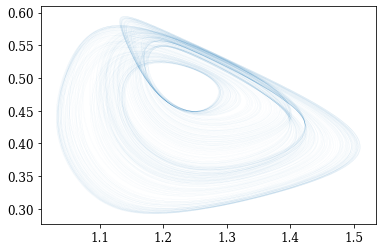

In [426]:
#seed=16, a=0 is chaotic
imp.reload(rmtchem)
np.random.seed(1)
m=20000
epsilon=epsilons[m]
epsilon=95
tmax=1e2
dt=1e0
start=timeit.default_timer()
ts,Xts,success=rmtchem.integrate(Xs[m]*(1+(0.5-np.random.random(size=n))*1e-1), eta, nu, k, (1+epsilon)*XD1,XD2,tmax,dt)
stop=timeit.default_timer()
print(stop-start,success)
tinds=np.where(ts>ts[-1]/4)[0]

plt.yscale('log')
plt.plot(ts[tinds],np.transpose(Xts[:,tinds])/Xs[m])
plt.show()
success,sol=rmtchem.steady(Xts[:,-1],eta,nu,k,(1+epsilon)*XD1,XD2)
print(success)
ev,evecs=np.linalg.eig(rmtchem.jac(0,sol,eta,nu,k,(1+epsilon)*XD1,XD2))
print(np.max(np.real(ev)),np.min(np.linalg.norm((sol-Xs)/sol,axis=1)))
plt.plot(Xts[0,tinds],Xts[1,tinds],linewidth=0.01,alpha=1.0)
plt.show()

39.742623911999544 True


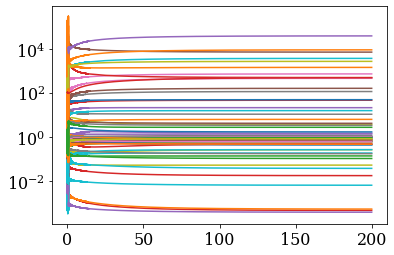

True
-0.02536234519369651


In [496]:
start=timeit.default_timer()
ts2,Xts2,success=rmtchem.integrate(Xts[:,-1]*(1+(0.5-np.random.random(size=n))*1e-2), eta, nu, k, (1+epsilon)*XD1,XD2,2*tmax,dt*10)
stop=timeit.default_timer()
print(stop-start,success)
plt.yscale('log')
plt.plot(ts2,np.transpose(Xts2)/Xs[m])
plt.show()
success,sol=rmtchem.steady(Xts2[:,-1],eta,nu,k,(1+epsilon)*XD1,XD2)
print(success)
ev,evecs=np.linalg.eig(rmtchem.jac(0,sol,eta,nu,k,(1+epsilon)*XD1,XD2))
print(np.max(np.real(ev)))

In [422]:
imp.reload(rmtchem)
X0=np.load('data/chaos/X0.npy')
epsilon=19
start=timeit.default_timer()
Xs2,epsilons2,evals2,bif2=rmtchem.quasistatic(X0, eta, nu, k, XD1, XD2, d1min,d1max,epsilon,-5e-4,epthrs=1e-2,depmax=1e-2,depmin=1e-16,stepsmax=2000,output=2, stop=False)
stop=timeit.default_timer()
print(len(Xs2),bif2,stop-start)
start=timeit.default_timer()
Xs3,epsilons3,evals3,bif3=rmtchem.quasistatic(X0, eta, nu, k, XD1, XD2, d1min,d1max,epsilon,5e-4,epthrs=1e-2,depmax=1e-2,depmin=1e-16,stepsmax=2000,output=2, stop=False)
stop=timeit.default_timer()
print(len(Xs3),bif3,stop-start)

0.177855	-1.000000e-02	256	
Hopf bifurcation!		17.775500
0.157680	-6.250000e-04	475	
Saddle-node bifurcation!	15.768000	-6.250000e-04	1	1	0.000000	1.829001
0.270118	6.250000e-04	1649	
Saddle-node bifurcation!	27.011750	6.250000e-04	1	1	0.000000	1.534915
0.251505	-1.000000e-02	1862	
Hopf bifurcation!		25.140500
1988 1 9.876128842995968000	
0.251645	1.000000e-02	551	
Hopf bifurcation!		25.174500
0.270101	6.250000e-04	764	
Saddle-node bifurcation!	27.010125	6.250000e-04	1	1	0.000000	2.799689
0.157689	-6.250000e-04	1957	
Saddle-node bifurcation!	15.768875	-6.250000e-04	1	1	2.244867	0.000000
1983 1 10.2158534890040760	


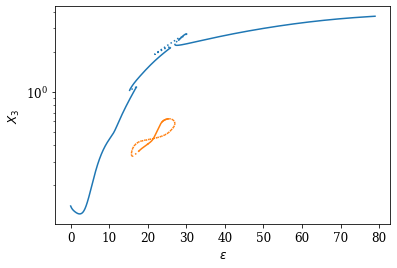

In [423]:
#seed=835 a=0 has a secondary branch 
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$X_3$')
inds1=np.where(np.max(np.real(evals),axis=1)<0)[0]
inds2=np.where(np.max(np.real(evals),axis=1)>=0)[0]
plt.yscale('log')
for inds in np.split(inds1, np.where(np.diff(inds1) != 1)[0]+1):
    for i in lst:
        plt.plot(epsilons[inds],Xs[inds,i],color=colors[0])
for inds in np.split(inds2, np.where(np.diff(inds2) != 1)[0]+1):
    for i in lst:
        plt.plot(epsilons[inds],Xs[inds,i],ls=':',color=colors[0])

inds1=np.where(np.max(np.real(evals2),axis=1)<0)[0]
inds2=np.where(np.max(np.real(evals2),axis=1)>=0)[0]
plt.yscale('log')
for inds in np.split(inds1, np.where(np.diff(inds1) != 1)[0]+1):
    for i in lst:
        plt.plot(epsilons2[inds],Xs2[inds,i],color=colors[1])
for inds in np.split(inds2, np.where(np.diff(inds2) != 1)[0]+1):
    for i in lst:
        plt.plot(epsilons2[inds],Xs2[inds,i],ls=':',color=colors[1])

inds1=np.where(np.max(np.real(evals3),axis=1)<0)[0]
inds2=np.where(np.max(np.real(evals3),axis=1)>=0)[0]
plt.yscale('log')
for inds in np.split(inds1, np.where(np.diff(inds1) != 1)[0]+1):
    for i in lst:
        plt.plot(epsilons3[inds],Xs3[inds,i],color=colors[1])
for inds in np.split(inds2, np.where(np.diff(inds2) != 1)[0]+1):
    for i in lst:
        plt.plot(epsilons3[inds],Xs3[inds,i],ls=':',color=colors[1])


In [152]:
np.save('data/chaos/Xs2.npy',Xs2)
np.save('data/chaos/epsilons2.npy',epsilons2)
np.save('data/chaos/evals2.npy',evals2)
np.save('data/chaos/Xs3.npy',Xs3)
np.save('data/chaos/epsilons3.npy',epsilons3)
np.save('data/chaos/evals3.npy',evals3)

13 204.72706472659476 0.40945412945318954
252.1317685660033 True


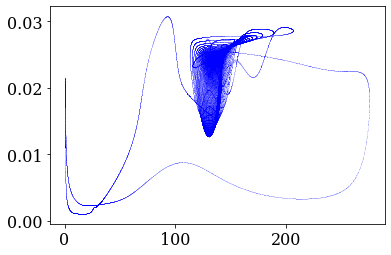

In [669]:
imp.reload(rmtchem)
np.random.seed(1)
m=np.where(np.max(np.real(evals),axis=1)>0)[0][0]
epsilon=epsilons[m]
epsilon=13
tmax=2*np.pi/(np.imag(evals[m,np.argmax(np.real(evals[m]))]))*500
dt=2*np.pi/(np.imag(evals[m,np.argmax(np.real(evals[m]))]))
print(epsilon,tmax,dt)
start=timeit.default_timer()
ts,Xts,success=rmtchem.integrate(Xs[m]*(1+(0.5-np.random.random(size=n))*1e-1), eta, nu, k, (1+epsilon)*XD1,XD2,tmax,dt)
stop=timeit.default_timer()
print(stop-start,success)

tinds=np.where(ts>tmax/10)[0]
ind1=2
ind2=4
plt.plot(Xts[ind1,tinds],Xts[ind2,tinds],'bo',markersize=0.01)

plt.subplots_adjust(wspace=0.5,hspace=0.0)
plt.savefig('plots/fig3c.pdf')
plt.show()

In [670]:
np.save('data/chaos/ts.npy',ts)
np.save('data/chaos/Xts.npy',Xts)

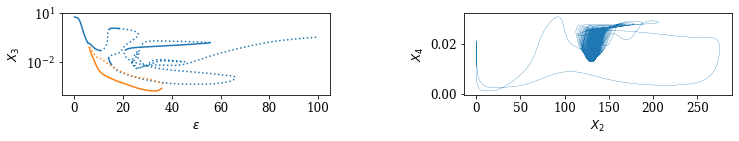

In [416]:
Xs=np.load('data/chaos/Xs1.npy')
epsilons=np.load('data/chaos/epsilons1.npy')
evals=np.load('data/chaos/evals1.npy')
Xs2=np.load('data/chaos/Xs2.npy')
epsilons2=np.load('data/chaos/epsilons2.npy')
evals2=np.load('data/chaos/evals2.npy')
Xs3=np.load('data/chaos/Xs3.npy')
epsilons3=np.load('data/chaos/epsilons3.npy')
evals3=np.load('data/chaos/evals3.npy')
ts=np.load('data/chaos/ts.npy')
Xts=np.load('data/chaos/Xts.npy')
m=np.where(np.max(np.real(evals),axis=1)>0)[0][0]
tmax=2*np.pi/(np.imag(evals[m,np.argmax(np.real(evals[m]))]))*500

lst=range(n)
lst=[3]

plt.subplots(1,2,figsize=(12,1.5))

plt.subplot(1,2,1)

plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$X_3$')
inds1=np.where(np.max(np.real(evals),axis=1)<0)[0]
inds2=np.where(np.max(np.real(evals),axis=1)>=0)[0]
plt.yscale('log')
for inds in np.split(inds1, np.where(np.diff(inds1) != 1)[0]+1):
    for i in lst:
        plt.plot(epsilons[inds],Xs[inds,i],color=colors[0])
for inds in np.split(inds2, np.where(np.diff(inds2) != 1)[0]+1):
    for i in lst:
        plt.plot(epsilons[inds],Xs[inds,i],ls=':',color=colors[0])

inds1=np.where(np.max(np.real(evals2),axis=1)<0)[0]
inds2=np.where(np.max(np.real(evals2),axis=1)>=0)[0]
plt.yscale('log')
for inds in np.split(inds1, np.where(np.diff(inds1) != 1)[0]+1):
    for i in lst:
        plt.plot(epsilons2[inds],Xs2[inds,i],color=colors[1])
for inds in np.split(inds2, np.where(np.diff(inds2) != 1)[0]+1):
    for i in lst:
        plt.plot(epsilons2[inds],Xs2[inds,i],ls=':',color=colors[1])

inds1=np.where(np.max(np.real(evals3),axis=1)<0)[0]
inds2=np.where(np.max(np.real(evals3),axis=1)>=0)[0]
plt.yscale('log')
for inds in np.split(inds1, np.where(np.diff(inds1) != 1)[0]+1):
    for i in lst:
        plt.plot(epsilons3[inds],Xs3[inds,i],color=colors[1])
for inds in np.split(inds2, np.where(np.diff(inds2) != 1)[0]+1):
    for i in lst:
        plt.plot(epsilons3[inds],Xs3[inds,i],ls=':',color=colors[1])

ax=plt.subplot(1,2,2)
ax.set_rasterization_zorder(0)
plt.xlabel(r'$X_2$')
plt.ylabel(r'$X_4$')
tinds=np.where(ts>tmax/10)[0]
ind1=2
ind2=4
plt.plot(Xts[ind1,tinds],Xts[ind2,tinds],zorder=-1,linewidth=0.01,alpha=1.0)

plt.subplots_adjust(wspace=0.5,hspace=0.0)
plt.savefig('plots/fig3c.pdf',dpi=300)
plt.show()

## Continuing limit cycles while adaptively refining the collocation grid. This works in principle, but we should periodically try to coarsen the grid so it doesn't strictly grow. We would need third derivatives as well for the 1st Lyapunov coefficient to find the limit cycle near Hopf bifurcations. It works best in log-space, and it is comparable to AUTO.

[0]
0.277800	1.000000e-02	2779	
Hopf bifurcation!		27.790000
0.491900	1.000000e-02	4920	
Hopf bifurcation!		49.200000
10000 10	1.000000e-02	10000	


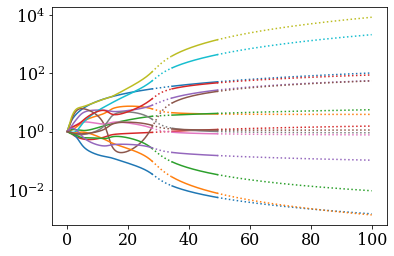

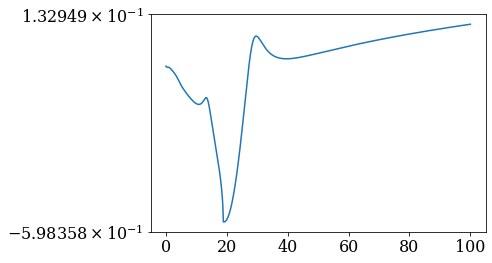

In [458]:
imp.reload(rmtchem)
n=8
nr=int(1.0*n*np.log(n))
nd=int(0.2*n)
na=int(0.5*nr)

n=16
nr=int(0.5*n*np.log(n))
nd=int(0.1*n)
na=int(0.0*nr)
seed=134
seed=3

np.random.seed(seed)
eta,nu,k,G=rmtchem.get_network(n,nr,na) 
row,col=np.where(eta[::2]-nu[::2]!=0)
data=(eta[::2]-nu[::2])[row,col]
A=csr_matrix((data,(row,col)),shape=(2*nr,n),dtype=int)
adj=A.T.dot(A)
g=nx.convert_matrix.from_scipy_sparse_matrix(adj)
lcc=np.array(list(max(nx.connected_components(g), key=len)))
n=len(lcc)
eta=eta[:,lcc]
nu=nu[:,lcc]
G=G[lcc]
d0=1e6
d1min=0
d1max=100
XD1,XD2,inds=rmtchem.get_drive(eta,nu,k,G,d0,nd)
X0=np.exp(-G)
print(inds)

r=np.linalg.matrix_rank(adj.toarray()[np.ix_(lcc,lcc)])
if(r==n):

    Xs,epsilons,evals,bif=rmtchem.quasistatic(X0, eta, nu, k, XD1, XD2, d1min,d1max,0,dep0=1e-2,output=2, stop=False)
    print(len(Xs),bif)

inds1=np.where(np.max(np.real(evals),axis=1)<0)[0]
inds2=np.where(np.max(np.real(evals),axis=1)>=0)[0]
plt.yscale('log')
for inds in np.split(inds1, np.where(np.diff(inds1) != 1)[0]+1):
    for i in range(n):
        plt.plot(epsilons[inds],Xs[inds,i]/np.exp(-G[i]),color=colors[np.mod(i,len(colors))])
for inds in np.split(inds2, np.where(np.diff(inds2) != 1)[0]+1):
    for i in range(n):
        plt.plot(epsilons[inds],Xs[inds,i]/np.exp(-G[i]),ls=':',color=colors[np.mod(i,len(colors))])
plt.show()


plt.yscale('symlog')
plt.plot(epsilons,np.max(np.real(evals),axis=1))
plt.show()

49.49999999999872 23.594181085858278 (0.0007653248498209163+0.26630232616742777j)


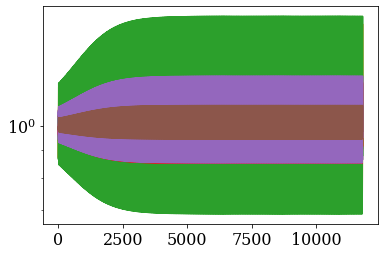

In [468]:
imp.reload(rmtchem)
m0=np.where(np.max(np.real(evals),axis=1)>0)[0][0]+1
# m0=np.where(np.max(np.real(evals),axis=1)<0)[0][-1]+50
m0=4950
epsilon=epsilons[m0]
period=2*np.pi/(np.imag(evals[m0,np.argmax(np.real(evals[m0]))]))
print(epsilon,period,evals[m0,np.argmax(np.real(evals[m0]))])
np.random.seed(1)
ts,Xts,success=rmtchem.integrate(Xs[m0]*(1+(0.5-np.random.random(size=n))*1e-1), eta, nu, k, (1+epsilon)*XD1,XD2,500*period,period/200)
plt.yscale('log')
plt.plot(ts,np.transpose(Xts)/Xs[m0])
plt.show()

201


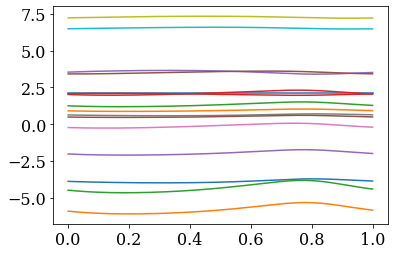

The algorithm converged to the desired accuracy. 401


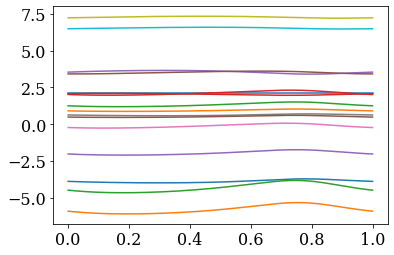

In [472]:
tinds=np.where(np.all([ts>ts[-1]-period],axis=0))[0]
period0=ts[tinds[-1]]-ts[tinds[0]]
print(len(tinds))
epsilon=epsilons[m0]
ts0=(ts[tinds]-ts[tinds[0]])/(ts[tinds[-1]]-ts[tinds[0]])
Xts0=Xts[:,tinds]
y0=np.log(Xts0)
plt.plot(ts0,np.transpose(y0))
plt.show()

epsilon=epsilons[m0]

sol0=solve_bvp(lambda ts,Yts,p: p[0]*np.transpose([np.exp(-Yts[:,i])*rmtchem.func(ts[i],np.exp(Yts[:,i]),eta,nu,k,(1+epsilon)*XD1,XD2) for i in range(len(ts))]), lambda xa,xb,p: (np.concatenate((xb-xa,[(xa@xa)-(y0[:,0]@y0[:,0])]))), ts0, y0, p=np.array([period0]), fun_jac=lambda ts,Yts,p: (p[0]*np.transpose([np.transpose(np.transpose(rmtchem.jac(ts[i],np.exp(Yts[:,i]),eta,nu,k,(1+epsilon)*XD1,XD2)*np.exp(Yts[:,i]))*np.exp(-Yts[:,i]))-np.diag(np.exp(-Yts[:,i])*rmtchem.func(ts[i],np.exp(Yts[:,i]),eta,nu,k,(1+epsilon)*XD1,XD2)) for i in range(len(ts))],(1,2,0)), np.transpose([[np.exp(-Yts[:,i])*rmtchem.func(ts[i],np.exp(Yts[:,i]),eta,nu,k,(1+epsilon)*XD1,XD2)] for i in range(len(ts))],[2,1,0])), bc_jac=lambda xa,xb,p: (np.concatenate((-np.identity(n),2*xa[np.newaxis,:]),axis=0),np.concatenate((np.identity(n),np.zeros(n)[np.newaxis,:]),axis=0),np.zeros((n+1,1))), max_nodes=10000,tol=1e0)
print(sol0.message,len(sol0.x))
plt.plot(sol0.x,np.transpose(sol0.y))
plt.show()

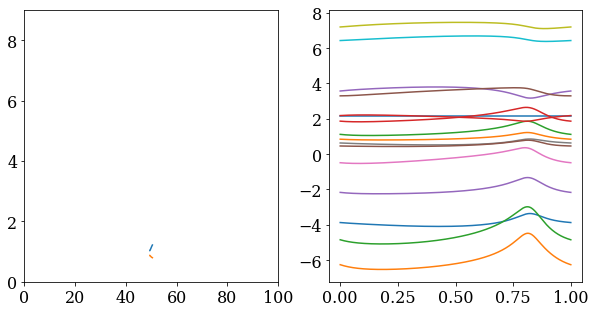

The algorithm converged to the desired accuracy. 100 63.264506864001305


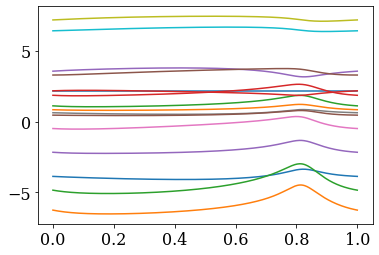

In [473]:
from IPython.display import clear_output

sols=[]
eps=[]
rolls=[]
sol=sol0
start=timeit.default_timer()
m=m0
m1=m0+100
dm=1

while sol.success and m<m1:
    clear_output(wait=True)
    epsilon=epsilons[m]
    sols.append(sol)
    eps.append(epsilon)
    mean=np.sum(np.diff(sol.x)*np.linalg.norm(sol.y[:,:-1],axis=0))
    mins=argrelmin(np.concatenate((np.abs(np.linalg.norm(sol.y,axis=0)-mean)[:-1],np.abs(np.linalg.norm(sol.y,axis=0)-mean))))[0]
    roll=int(np.mod(mins[np.argmin(np.abs(np.mod(mins+len(sol.x)/2,len(sol.x))-len(sol.x)/2))]+len(sol.x)/2,len(sol.x))-len(sol.x)/2)
    y0=np.roll(sol.y,-roll,axis=1)
    x0=np.concatenate(([0],np.cumsum(np.roll(np.diff(sol.x),-roll+1))))
    p0=sol.p[0]
    rolls.append(roll)
    sol=solve_bvp(lambda ts,Yts,p: p[0]*np.transpose([np.exp(-Yts[:,i])*rmtchem.func(ts[i],np.exp(Yts[:,i]),eta,nu,k,(1+epsilon)*XD1,XD2) for i in range(len(ts))]), lambda xa,xb,p: (np.concatenate((xb-xa,[(xa@xa)-(y0[:,0]@y0[:,0])]))), x0, y0, p=np.array([p0]), fun_jac=lambda ts,Yts,p: (p[0]*np.transpose([np.transpose(np.transpose(rmtchem.jac(ts[i],np.exp(Yts[:,i]),eta,nu,k,(1+epsilon)*XD1,XD2)*np.exp(Yts[:,i]))*np.exp(-Yts[:,i]))-np.diag(np.exp(-Yts[:,i])*rmtchem.func(ts[i],np.exp(Yts[:,i]),eta,nu,k,(1+epsilon)*XD1,XD2)) for i in range(len(ts))],(1,2,0)), np.transpose([[np.exp(-Yts[:,i])*rmtchem.func(ts[i],np.exp(Yts[:,i]),eta,nu,k,(1+epsilon)*XD1,XD2)] for i in range(len(ts))],[2,1,0])), bc_jac=lambda xa,xb,p: (np.concatenate((-np.identity(n),2*xa[np.newaxis,:]),axis=0),np.concatenate((np.identity(n),np.zeros(n)[np.newaxis,:]),axis=0),np.zeros((n+1,1))), max_nodes=10000,tol=1e0)
    print('%f\t%i\t%e\t%i\t\r'%(epsilon, len(sol.x),sol.p[0]-period,roll),end='')
    m=m+dm
    plt.subplots(1,2,figsize=(10,5))
    plt.subplot(1,2,1)
    plt.xlim(0,100)
    plt.ylim(0,9)
    plt.plot(eps,[np.max(sols[i].y[1]) for i in range(len(sols))])
    plt.plot(eps,[np.min(sols[i].y[1]) for i in range(len(sols))])
    plt.subplot(1,2,2)
    plt.plot(sol.x,np.transpose(sol.y))
    plt.show()
    
stop=timeit.default_timer()
print(sol.message,len(sols),stop-start)
plt.plot(sol.x,np.transpose(sol.y))
plt.show()
sols0=sols.copy()
eps0=eps.copy()
rolls0=rolls.copy()

/Users/zack/opt/anaconda3/envs/cantera_env/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/zack/opt/anaconda3/envs/cantera_env/lib/python3.7/site-packages/scipy/integrate/_bvp.py:312: RuntimeWarning: invalid value encountered in subtract
  0.125 * h * (f[:, 1:] - f[:, :-1]))
/Users/zack/Documents/rmtchem/rmtchem.py:58: RuntimeWarning: invalid value encountered in multiply
  return XD1-XD2*X+rates(X,eta,nu,k).dot(eta-nu)
/Users/zack/opt/anaconda3/envs/cantera_env/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/zack/Documents/rmtchem/rmtchem.py:55: RuntimeWarning: overflow encountered in power
  return k*np.product(X**nu,axis=1)
/Users/zack/opt/anaconda3/envs/cantera_env/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: i

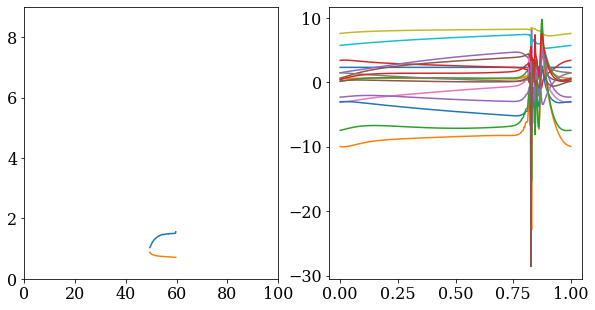

A singular Jacobian encountered when solving the collocation system. 193 115.35777676200087


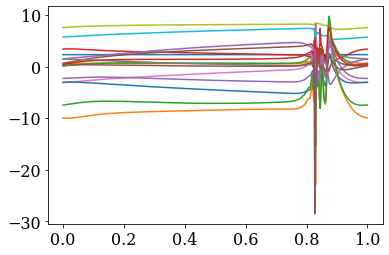

In [481]:
from IPython.display import clear_output
imp.reload(rmtchem)
sols=sols0.copy()
eps=eps0.copy()
rolls=rolls0.copy()

sol=sols[-1]
start=timeit.default_timer()
m=m0+100
m1=len(epsilons)
dm=10
while sol.success and m<m1:
    clear_output(wait=True)
    epsilon=epsilons[m]
    sols.append(sol)
    eps.append(epsilon)
    mean=np.sum(np.diff(sol.x)*np.linalg.norm(sol.y[:,:-1],axis=0))
    mins=argrelmin(np.concatenate((np.abs(np.linalg.norm(sol.y,axis=0)-mean)[:-1],np.abs(np.linalg.norm(sol.y,axis=0)-mean))))[0]
    roll=int(np.mod(mins[np.argmin(np.abs(np.mod(mins+len(sol.x)/2,len(sol.x))-len(sol.x)/2))]+len(sol.x)/2,len(sol.x))-len(sol.x)/2)
    y0=np.roll(sol.y,-roll,axis=1)
    x0=np.concatenate(([0],np.cumsum(np.roll(np.diff(sol.x),-roll+1))))
    p0=sol.p[0]
    rolls.append(roll)
#     x0=sol.x
#     y0=sol.y
    sol=solve_bvp(lambda ts,Yts,p: p[0]*np.transpose([np.exp(-Yts[:,i])*rmtchem.func(ts[i],np.exp(Yts[:,i]),eta,nu,k,(1+epsilon)*XD1,XD2) for i in range(len(ts))]), lambda xa,xb,p: (np.concatenate((xb-xa,[(xa@xa)-(y0[:,0]@y0[:,0])]))), x0, y0, p=np.array([p0]), fun_jac=lambda ts,Yts,p: (p[0]*np.transpose([np.transpose(np.transpose(rmtchem.jac(ts[i],np.exp(Yts[:,i]),eta,nu,k,(1+epsilon)*XD1,XD2)*np.exp(Yts[:,i]))*np.exp(-Yts[:,i]))-np.diag(np.exp(-Yts[:,i])*rmtchem.func(ts[i],np.exp(Yts[:,i]),eta,nu,k,(1+epsilon)*XD1,XD2)) for i in range(len(ts))],(1,2,0)), np.transpose([[np.exp(-Yts[:,i])*rmtchem.func(ts[i],np.exp(Yts[:,i]),eta,nu,k,(1+epsilon)*XD1,XD2)] for i in range(len(ts))],[2,1,0])), bc_jac=lambda xa,xb,p: (np.concatenate((-np.identity(n),2*xa[np.newaxis,:]),axis=0),np.concatenate((np.identity(n),np.zeros(n)[np.newaxis,:]),axis=0),np.zeros((n+1,1))), max_nodes=10000,tol=1e2)
    print('%f\t%i\t%e\t%i\t\r'%(epsilon, len(sol.x),sol.p[0]-period,roll),end='')
    m=m+dm
    plt.subplots(1,2,figsize=(10,5))
    plt.subplot(1,2,1)
    plt.xlim(0,100)
    plt.ylim(0,9)
    plt.plot(eps,[np.max(sols[i].y[1]) for i in range(len(sols))])
    plt.plot(eps,[np.min(sols[i].y[1]) for i in range(len(sols))])
    plt.subplot(1,2,2)
    plt.plot(sol.x,np.transpose(sol.y))
    plt.show()
    
stop=timeit.default_timer()
print(sol.message,len(sols),stop-start)
plt.plot(sol.x,np.transpose(sol.y))
plt.show()

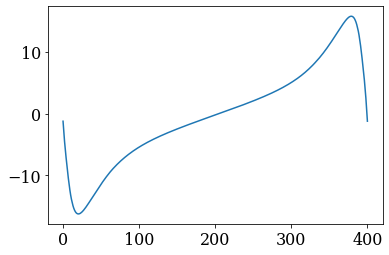

In [482]:
#Let's choose the rotation to minimize this phase change
plt.plot([np.sum((np.roll(y0[:,:-1],m,axis=1)*np.diff(y0,axis=1)/np.diff(x0))*np.diff(x0)) for m in range(len(x0))])

A singular Jacobian encountered when solving the collocation system. 193 59.69999999999669 132.25665091300107


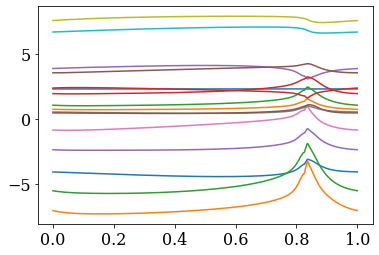

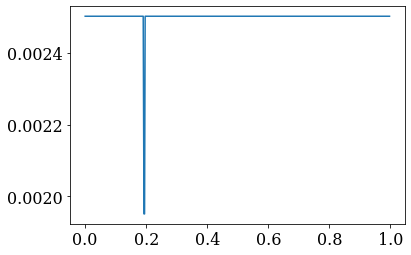

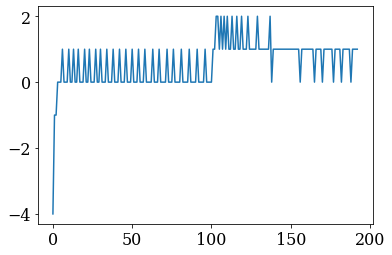

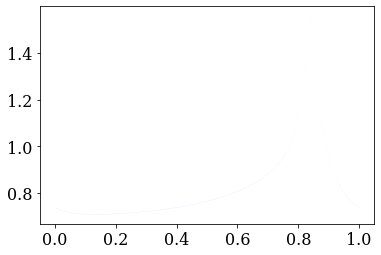

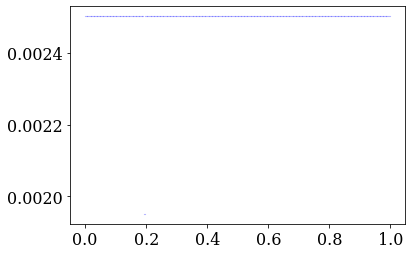

In [483]:
stop=timeit.default_timer()
print(sol.message,len(sols),epsilon,stop-start)
plt.plot(sols[-1].x,np.transpose(sols[-1].y))
plt.show()
plt.plot(sols[-1].x[:-1],np.diff(sols[-1].x))
plt.show()
plt.plot(rolls)
plt.show()
plt.plot(sols[-1].x,np.transpose(sols[-1].y)[:,1],'bo',markersize=0.01)
plt.show()
plt.plot(sols[-1].x[:-1],np.diff(sols[-1].x),'bo',markersize=0.1)
plt.show()

In [361]:
sol=sols[-2]
roll

-2

In [441]:
sol=sols[-2]
epsilon=epsilons[m-1*dm]
y0=sol.y
x0=sol.x
period0=sol.p
# mean=np.sum(np.diff(sol.x)*np.linalg.norm(sol.y[:,:-1],axis=0))
# mins=argrelmin(np.concatenate((np.abs(np.linalg.norm(sol.y,axis=0)-mean)[:-1],np.abs(np.linalg.norm(sol.y,axis=0)-mean))))[0]
# roll=int(np.mod(mins[np.argmin(np.abs(np.mod(mins+len(sol.x)/2,len(sol.x))-len(sol.x)/2))]+len(sol.x)/2,len(sol.x))-len(sol.x)/2)
# y0=np.roll(sol.y,-roll,axis=1)
# x0=np.concatenate(([0],np.cumsum(np.roll(np.diff(sol.x),-roll))))
sol2=solve_bvp(lambda ts,Yts,p: p[0]*np.transpose([np.exp(-Yts[:,i])*rmtchem.func(ts[i],np.exp(Yts[:,i]),eta,nu,k,(1+epsilon)*XD1,XD2) for i in range(len(ts))]), lambda xa,xb,p: (np.concatenate((xb-xa,[(xa@xa)/(y0[:,0]@y0[:,0])-1]))), x0, y0,period0, fun_jac=lambda ts,Yts,p: (p[0]*np.transpose([np.transpose(np.transpose(rmtchem.jac(ts[i],np.exp(Yts[:,i]),eta,nu,k,(1+epsilon)*XD1,XD2)*np.exp(Yts[:,i]))*np.exp(-Yts[:,i]))-np.diag(np.exp(-Yts[:,i])*rmtchem.func(ts[i],np.exp(Yts[:,i]),eta,nu,k,(1+epsilon)*XD1,XD2)) for i in range(len(ts))],(1,2,0)), np.transpose([[np.exp(-Yts[:,i])*rmtchem.func(ts[i],np.exp(Yts[:,i]),eta,nu,k,(1+epsilon)*XD1,XD2)] for i in range(len(ts))],[2,1,0])), bc_jac=lambda xa,xb,p: (np.concatenate((-np.identity(n),((2*xa)/(y0[:,0]@y0[:,0]))[np.newaxis,:]),axis=0),np.concatenate((np.identity(n),np.zeros(n)[np.newaxis,:]),axis=0),np.zeros((n+1,1))), max_nodes=10000,tol=1e2)
print(sol2.success)

/Users/zack/opt/anaconda3/envs/cantera_env/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in multiply
  # This is added back by InteractiveShellApp.init_path()
/Users/zack/opt/anaconda3/envs/cantera_env/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()


False


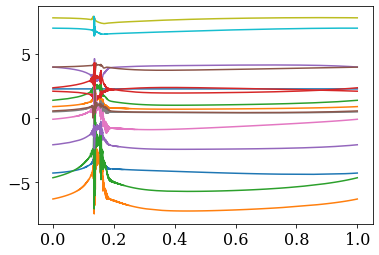

In [390]:
plt.plot(sol2.x,np.transpose(sol2.y))
plt.show()

In [ ]:
#n=64, r=0.5, a=0, d=0.1, seed=117, epsilon>80 is chaotic
#n=64, r=0.5, a=0, d=0.1, seed=12, epsilon>25 is chaotic
#n=64, r=0.5, a=0, d=0.1, seed=16, epsilon>25 is snaking

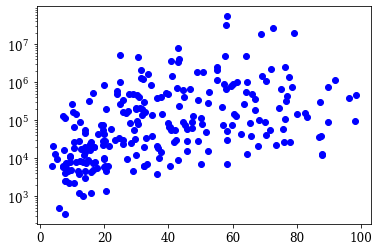

In [444]:
test=np.loadtxt('data/hystereses/64_0.5_0.1_0.txt')
inds=np.where(test[:,4]>0)[0]
plt.yscale('log')
plt.plot(test[inds,5],test[inds,6],'bo')

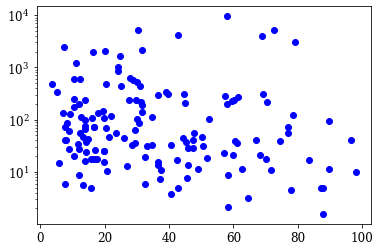

In [240]:
inds=np.where(test[:,4]==2)[0]
plt.yscale('log')
plt.plot(test[inds,5],test[inds,6]/test[inds,5]**2,'bo')
plt.show()